In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [4]:
def compute_loss(y, tx, w):
    coeff = 1/(2*(len(y)))
    first_part = tx @ w
    scnd_part = y - first_part
    main = np.power(scnd_part,2)
    result = coeff*np.sum(main,axis=0)
    return result

In [5]:
def least_squares(y, tx):
    w = np.linalg.solve(np.transpose(tx) @ tx,np.transpose(tx) @ y)
    MSE = compute_loss(y,tx,w)
    return w,MSE

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [6]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    w, _ = least_squares(y, tx)
    plt.scatter(x, y)
    d = tx.dot(w)
    plt.scatter(x ,d, c='r')
    plt.show()
    return w

Test it here

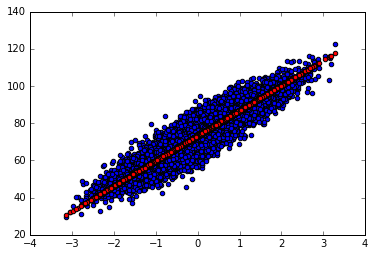

[ 73.293922    13.47971243]


In [7]:
w = test_your_least_squares()
print(w)

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [8]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [9]:
def build_poly(x, degree):
    x_mat = x[...,np.newaxis]
    new_x = np.repeat(x,degree+1,axis=1)
    power = np.arange(degree+1)
    new_x = np.power(new_x,power)
    return new_x

In [10]:
def compute_RMSE(y, tx, w):
    return np.sqrt(2*compute_loss(y, tx, w))

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [11]:
#from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        x_poly = build_poly(x,degree)
        print(x_poly.shape)
        w,mse = least_squares(y,x_poly)
        rmse = compute_RMSE(y,x_poly,w)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, w, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

(50, 2)
Processing 1th experiment, degree=1, rmse=0.47187607963421874
(50, 4)
Processing 2th experiment, degree=3, rmse=0.25858277667737467
(50, 8)
Processing 3th experiment, degree=7, rmse=0.2496587036090727
(50, 13)
Processing 4th experiment, degree=12, rmse=0.24349809575326772


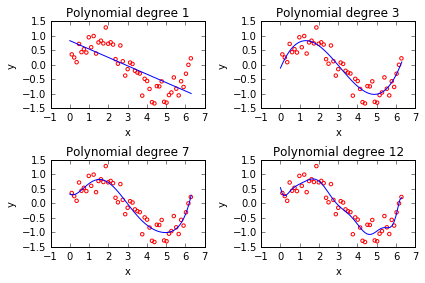

In [12]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [13]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    marker = int(y.shape[0]*ratio)
    ids = np.arange(y.shape[0])
    np.random.shuffle(ids)
    ids_train = ids[:marker]
    ids_test = ids[marker:]
    
    return x[ids_train],x[ids_test],y[ids_train],y[ids_test]


Then, test your `split_data` function below.

In [14]:
def train_test_split_demo(x, y, degree, ratio, seed):
    
    x_train,x_test,y_train,y_test = split_data(x, y, ratio, seed) 
    x_train = build_poly(x_train,degree)
    x_test = build_poly(x_test,degree)
    w_train,MSE_train = least_squares(y_train,x_train)
    w_test,MSE_test = least_squares(y_test,x_test)
    RMSE_train = compute_RMSE(y_train,x_train,w_train)
    RMSE_test = compute_RMSE(y_test,x_test,w_train)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=RMSE_train, te=RMSE_test))


In [15]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.253
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.607
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.985
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=5.692


# 3 Ridge Regression
Please fill in the function below.

In [16]:
x.shape

(50,)

In [17]:
test = np.transpose(x[np.newaxis,...]) @ y[np.newaxis,...]
test.shape


(50, 50)

In [18]:
def ridge_regression(y, tx, lambda_):
    w = np.linalg.inv(tx.T.dot(tx) + lambda_ * np.identity(tx.shape[1])).dot(tx.T).dot(y)
    MSE = compute_loss(y,tx,w)
    return w,MSE
    
w1,_ = ridge_regression(y, x[..., np.newaxis], 0)
w2,_ = least_squares(y, x[..., np.newaxis])
print(w1, w2)

[-0.09255479] [-0.09255479]


In [19]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 1, 15)
    x_train,x_test,y_train,y_test = split_data(x, y, ratio, seed) 
    x_train = build_poly(x_train,degree)
    x_test = build_poly(x_test,degree)
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w_train,MSE_train = ridge_regression(y_train,x_train,lambda_)
        w_test,MSE_test = ridge_regression(y_test,x_test,lambda_)
        RMSE_train = compute_RMSE(y_train,x_train,w_train)
        RMSE_test = compute_RMSE(y_test,x_test,w_train)
        rmse_tr.append(RMSE_train)
        rmse_te.append(RMSE_test)
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.004, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.010, Training RMSE=0.228, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.027, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.072, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.193, Training RMSE=0.231, Testing RMSE=0.316
proportion=0.5, degree=7, lambda=0.518, Training RMSE=0.234, Testing RMSE=0.293
proportion=0.5, degree=7, lambda=1.389, 

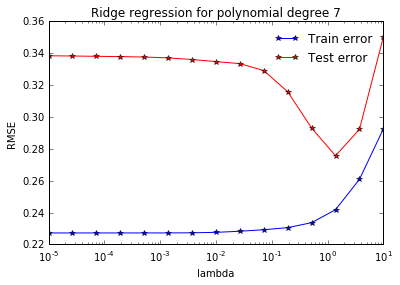

In [20]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)